In [1]:
# from bokeh.io import show, output_file
# from bokeh.plotting import figure
# from bokeh.models import Circle, MultiLine, HoverTool, TapTool, BoxSelectTool
# from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
# from bokeh.palettes import Spectral4

import matplotlib.pyplot as plt
import networkx as nx
import sqlite3

%matplotlib inline

In [2]:
db_path_graph = 'graph.sql'
db_path_gumore = 'gumore.sql'

In [3]:
G = nx.DiGraph()
G_flow = nx.DiGraph()
G_flow_multi = nx.MultiDiGraph()

In [4]:
db_graph = sqlite3.connect(db_path_graph)
db_graph.enable_load_extension(True)
db_graph.load_extension('mod_spatialite')
db_gumore = sqlite3.connect(db_path_gumore)

OperationalError: The specified module could not be found.


In [5]:
c = db_graph.cursor()

c.execute('select nr, einf, round(ST_X("geometrie"),1) as x, round(ST_Y("geometrie"),1) as y from meineKnoten')
column_names_att = [x[0] for x in c.description][1:]
while True:
    row = c.fetchone()
    if row == None:
        break
    atts = zip(column_names_att, row[1:])
    att_dict = {x: y for (x, y) in atts}
    G.add_nodes_from([(row[0], att_dict)])
    
c.execute('select von, nach, name, v, kap, dtv, round(ST_LENGTH("geometrie"), 1) as length from meineStrecken')
column_names_att = [x[0] for x in c.description][2:]
while True:
    row = c.fetchone()
    if row == None:
        break
    atts = zip(column_names_att, row[2:])
    att_dict = {x: y for (x, y) in atts}
    G.add_edges_from([(row[0], row[1], att_dict)])
    
pos = {x[0]: (x[1]['x'], x[1]['y']) for x in G.nodes.data()}


c = db_gumore.cursor()
c.execute('select f, t, commodity, round(qty, 2) as qty, mode from outtrips')
column_names_att = [x[0] for x in c.description][2:]
while True:
    row = c.fetchone()
    if row == None:
        break
    atts = zip(column_names_att, row[2:])
    att_dict = {x: y for (x, y) in atts}
    G_flow.add_edges_from([(row[0], row[1], {'qty': row[3]})])
    G_flow_multi.add_edges_from([(row[0], row[1], att_dict)])

In [6]:
G.nodes.data()

NodeDataView({'1': {'einf': '5', 'x': 235.8, 'y': -139.0}, '2': {'einf': '4', 'x': 306.3, 'y': -95.7}, '3': {'einf': None, 'x': 443.6, 'y': -108.3}, '4': {'einf': None, 'x': 501.4, 'y': -177.0}, '5': {'einf': None, 'x': 454.5, 'y': -336.0}, '6': {'einf': '3', 'x': 329.8, 'y': -339.6}, '7': {'einf': '6', 'x': 234.0, 'y': -260.1}, '9': {'einf': None, 'x': 440.0, 'y': -245.6}, '10': {'einf': None, 'x': 306.3, 'y': -186.0}, '11': {'einf': None, 'x': 416.5, 'y': -155.3}, '12': {'einf': None, 'x': 340.6, 'y': -272.7}, '20': {'einf': '2', 'x': 526.7, 'y': -113.7}, '21': {'einf': '1', 'x': 524.9, 'y': -273.6}})

In [7]:
G.edges.data()

OutEdgeDataView([('1', '2', {'name': 'str1', 'v': 40.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 84.7}), ('1', '10', {'name': 'str2', 'v': 50.0, 'kap': 2300.0, 'dtv': 0.0, 'length': 84.7}), ('1', '7', {'name': 'str13', 'v': 25.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 119.3}), ('2', '3', {'name': 'str3', 'v': 60.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 139.7}), ('3', '11', {'name': 'str4', 'v': 30.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 54.2}), ('3', '20', {'name': 'str20', 'v': 20.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 83.3}), ('4', '21', {'name': 'str23', 'v': 30.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 99.5}), ('5', '6', {'name': 'str9', 'v': 30.0, 'kap': 200.0, 'dtv': 0.0, 'length': 124.7}), ('6', '7', {'name': 'str12', 'v': 30.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 124.5}), ('9', '4', {'name': 'str7', 'v': 30.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 92.1}), ('9', '5', {'name': 'str8', 'v': 30.0, 'kap': 2000.0, 'dtv': 0.0, 'length': 91.5}), ('9', '12', {'name': 'str15', 'v': 50.0, 'kap': 

In [8]:
G_flow.edges.data()

OutEdgeDataView([('1', '1', {'qty': 56.42}), ('1', '3', {'qty': 32.5}), ('1', '4', {'qty': 0.2}), ('1', '2', {'qty': 2.35}), ('1', '5', {'qty': 0.14}), ('1', '6', {'qty': 8.39}), ('3', '1', {'qty': 20.12}), ('3', '3', {'qty': 6.94}), ('3', '4', {'qty': 0.51}), ('3', '2', {'qty': 0.01}), ('3', '5', {'qty': 0.0}), ('3', '6', {'qty': 0.96}), ('4', '6', {'qty': 1.51}), ('4', '1', {'qty': 0.75}), ('4', '2', {'qty': 0.05}), ('4', '3', {'qty': 3.19}), ('4', '4', {'qty': 0.92}), ('4', '5', {'qty': 0.08}), ('6', '2', {'qty': 0.25}), ('6', '6', {'qty': 183.68}), ('6', '1', {'qty': 6.83}), ('6', '3', {'qty': 1.27}), ('6', '4', {'qty': 0.32}), ('6', '5', {'qty': 1.98}), ('2', '1', {'qty': 1.26}), ('2', '3', {'qty': 4.93}), ('2', '2', {'qty': 0.13}), ('2', '4', {'qty': 0.01}), ('2', '5', {'qty': 0.0}), ('2', '6', {'qty': 0.16}), ('5', '1', {'qty': 0.28}), ('5', '2', {'qty': 0.0}), ('5', '3', {'qty': 0.01}), ('5', '4', {'qty': 0.04}), ('5', '5', {'qty': 0.41}), ('5', '6', {'qty': 4.88})])

In [9]:
G_flow.nodes.data()

NodeDataView({'1': {}, '3': {}, '4': {}, '6': {}, '2': {}, '5': {}})

In [10]:
G_flow_multi.edges.data()

OutMultiEdgeDataView([('1', '1', {'commodity': 'heavy letter', 'qty': 57.98, 'mode': 'KEP'}), ('1', '1', {'commodity': 'box', 'qty': 165.61, 'mode': 'HGV'}), ('1', '1', {'commodity': 'container', 'qty': 56.42, 'mode': 'HGV'}), ('1', '3', {'commodity': 'heavy letter', 'qty': 33.4, 'mode': 'KEP'}), ('1', '3', {'commodity': 'box', 'qty': 59.18, 'mode': 'HGV'}), ('1', '3', {'commodity': 'container', 'qty': 32.5, 'mode': 'HGV'}), ('1', '4', {'commodity': 'heavy letter', 'qty': 0.0, 'mode': 'HGV'}), ('1', '4', {'commodity': 'heavy letter', 'qty': 8.62, 'mode': 'Train'}), ('1', '4', {'commodity': 'box', 'qty': 3.52, 'mode': 'HGV'}), ('1', '4', {'commodity': 'container', 'qty': 0.2, 'mode': 'HGV'}), ('1', '2', {'commodity': 'box', 'qty': 6.59, 'mode': 'HGV'}), ('1', '2', {'commodity': 'container', 'qty': 2.35, 'mode': 'HGV'}), ('1', '5', {'commodity': 'box', 'qty': 2.11, 'mode': 'HGV'}), ('1', '5', {'commodity': 'container', 'qty': 0.14, 'mode': 'HGV'}), ('1', '6', {'commodity': 'box', 'qty': 

# Visualisierung

## pyplot

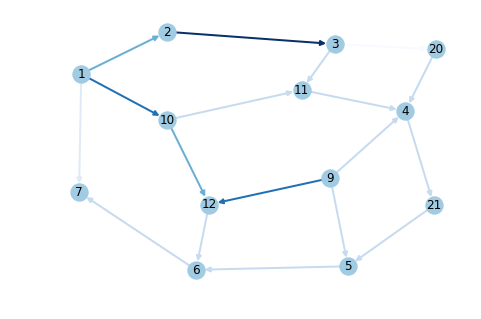

In [11]:
# pos = nx.spectral_layout(G)

colors = [x[2]['v'] for x in G.edges.data()]
# print(colors)
nx.draw(G, pos, with_labels=True, node_color='#A0CBE2', edge_color=colors, width=2,
        edge_cmap=plt.cm.Blues, edge_vmin = min(colors), edge_vmax = max(colors))
# plt.show()

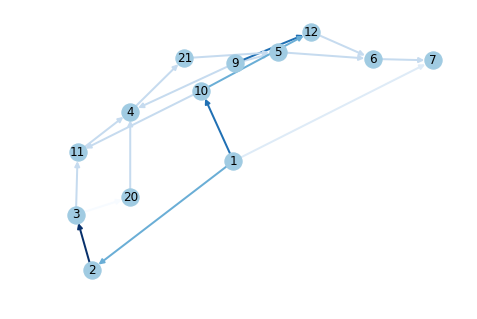

In [12]:
pos_spring = nx.spring_layout(G, weight='v', k=0.8)

colors = [x[2]['v'] for x in G.edges.data()]
nx.draw(G, pos_spring, with_labels=True, node_color='#A0CBE2', edge_color=colors, width=2,
        edge_cmap=plt.cm.Blues, edge_vmin = min(colors), edge_vmax = max(colors))

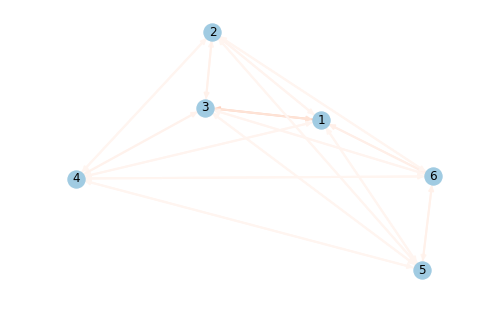

In [13]:
colors = [x[2]['qty'] for x in G_flow.edges.data()]
pos_flow = nx.spring_layout(G_flow, weight='qty')
nx.draw(G_flow, pos_flow, with_labels=True, node_color='#A0CBE2', edge_color=colors, width=2,
        edge_cmap=plt.cm.Reds, edge_vmin = min(colors), edge_vmax = max(colors))

In [14]:
G_flow.edges.data()

OutEdgeDataView([('1', '1', {'qty': 56.42}), ('1', '3', {'qty': 32.5}), ('1', '4', {'qty': 0.2}), ('1', '2', {'qty': 2.35}), ('1', '5', {'qty': 0.14}), ('1', '6', {'qty': 8.39}), ('3', '1', {'qty': 20.12}), ('3', '3', {'qty': 6.94}), ('3', '4', {'qty': 0.51}), ('3', '2', {'qty': 0.01}), ('3', '5', {'qty': 0.0}), ('3', '6', {'qty': 0.96}), ('4', '6', {'qty': 1.51}), ('4', '1', {'qty': 0.75}), ('4', '2', {'qty': 0.05}), ('4', '3', {'qty': 3.19}), ('4', '4', {'qty': 0.92}), ('4', '5', {'qty': 0.08}), ('6', '2', {'qty': 0.25}), ('6', '6', {'qty': 183.68}), ('6', '1', {'qty': 6.83}), ('6', '3', {'qty': 1.27}), ('6', '4', {'qty': 0.32}), ('6', '5', {'qty': 1.98}), ('2', '1', {'qty': 1.26}), ('2', '3', {'qty': 4.93}), ('2', '2', {'qty': 0.13}), ('2', '4', {'qty': 0.01}), ('2', '5', {'qty': 0.0}), ('2', '6', {'qty': 0.16}), ('5', '1', {'qty': 0.28}), ('5', '2', {'qty': 0.0}), ('5', '3', {'qty': 0.01}), ('5', '4', {'qty': 0.04}), ('5', '5', {'qty': 0.41}), ('5', '6', {'qty': 4.88})])

[57.98, 33.4, 0.0, 8.62, 20.64, 223.94, 5.42, 0.0, 8.62, 5.42, 0.0, 6.92, 7.03, 0.0, 186.05, 6.92, 7.03]
[33.4, 0.0, 8.62, 20.64, 5.42, 0.0, 8.62, 5.42, 0.0, 6.92, 7.03, 0.0, 6.92, 7.03]


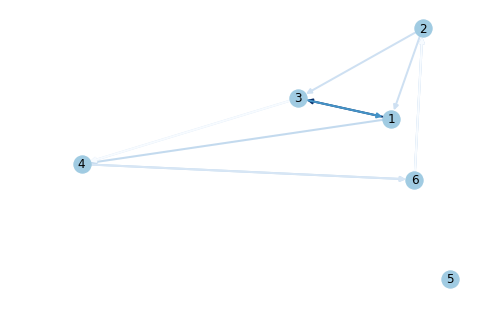

In [19]:
commodity = 'heavy letter'

pos_flow_multi = nx.spring_layout(G_flow_multi, weight='qty')

colors = [x[2]['qty'] for x in G_flow_multi.edges.data() if x[2]['commodity'] == commodity]
edges = [x[2]['qty'] for x in G_flow_multi.edges.data() if (x[0] != x[1]) and (x[2]['commodity'] == commodity)]
edgelist = [(x[0], x[1]) for x in G_flow_multi.edges.data() if x[2]['commodity'] == commodity]
print(colors)
print(edges)
nx.draw(G_flow_multi, pos_flow_multi, edgelist=edgelist, with_labels=True, node_color='#A0CBE2', edge_color=colors, width=2,
        edge_cmap=plt.cm.Blues, edge_vmin = min(edges), edge_vmax = max(edges))
# plt.show()

In [18]:
G_flow_multi.edges()

OutMultiEdgeDataView([('1', '1'), ('1', '1'), ('1', '1'), ('1', '3'), ('1', '3'), ('1', '3'), ('1', '4'), ('1', '4'), ('1', '4'), ('1', '4'), ('1', '2'), ('1', '2'), ('1', '5'), ('1', '5'), ('1', '6'), ('1', '6'), ('3', '1'), ('3', '1'), ('3', '1'), ('3', '3'), ('3', '3'), ('3', '3'), ('3', '3'), ('3', '3'), ('3', '4'), ('3', '4'), ('3', '4'), ('3', '4'), ('3', '2'), ('3', '2'), ('3', '2'), ('3', '5'), ('3', '5'), ('3', '5'), ('3', '5'), ('3', '6'), ('3', '6'), ('3', '6'), ('3', '6'), ('4', '6'), ('4', '6'), ('4', '6'), ('4', '6'), ('4', '1'), ('4', '1'), ('4', '2'), ('4', '2'), ('4', '3'), ('4', '3'), ('4', '4'), ('4', '4'), ('4', '5'), ('4', '5'), ('6', '2'), ('6', '2'), ('6', '2'), ('6', '2'), ('6', '2'), ('6', '2'), ('6', '6'), ('6', '6'), ('6', '6'), ('6', '6'), ('6', '1'), ('6', '1'), ('6', '3'), ('6', '3'), ('6', '3'), ('6', '3'), ('6', '4'), ('6', '4'), ('6', '5'), ('6', '5'), ('2', '1'), ('2', '1'), ('2', '1'), ('2', '3'), ('2', '3'), ('2', '3'), ('2', '2'), ('2', '2'), ('2', 

## Bokeh
https://anaconda.org/viz-group/graph_edge_and_node_select/notebook

https://bokeh.pydata.org/en/latest/docs/user_guide/graph.html#networkx-integration

In [17]:
plot = figure(title='GUMORE', x_range=(0, 800), y_range=(-500, 500))
graph = from_networkx(G, pos, scale=1, center=(0,0))

node_hover_tool = HoverTool(tooltips=[('name', '@name'), ('v', '@v')])
plot.add_tools(node_hover_tool, TapTool(), BoxSelectTool())

graph.node_renderer.glyph = Circle(size=15)
graph.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph)
show(plot)

## d3.js
https://beta.observablehq.com/@mbostock/d3-force-directed-graph

# Analyse

In [18]:
list(nx.shortest_path(G, source='1', target='21'))

['1', '10', '11', '4', '21']

# OSMNX

In [19]:
import osmnx as ox

ModuleNotFoundError: No module named 'osmnx'

In [ ]:
G_ox = ox.graph_from_place('Austria, Vienna', network_type='drive')